# Imports

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns

# Load Data

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# Prepare Data

In [ ]:
X_train, X_test, y_train, y_test = # split the data

X_train = # transform the whole data to 'float32'
X_test = # transform the whole data to 'float32'

# Define Dataset Class for PyTorch

Why do we need dataset classes when using pytorch? What are their arguments? Which methods are they required to have?

In [ ]:
class IrisData(Dataset):

    def __init__(self,) -> None: # add necessary arguments
        super().__init__()
        self.X = torch.from_numpy(X_train)
        self.y = torch.from_numpy(y_train)
        self.y = self.y.type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return # return a tuple with x,y at a given index

    def __len__(self):
        # complete this function

# Load the Data into Dataloader

In [ ]:
iris_data = IrisData(X_train=X_train, y_train=y_train)
train_loader = DataLoader(dataset=iris_data, batch_size=32)

In [ ]:
print(f"X Shape: {iris_data.X.shape}, y shape: {iris_data.y.shape}")

X Shape: torch.Size([120, 4]), y shape: torch.Size([120])


# Define Model

In [ ]:
class MultiClassNet(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN_FEATURES):
        super().__init__()
        self.lin1 = nn.Linear(NUM_FEATURES, HIDDEN_FEATURES)
        self.lin2 = nn.Linear(HIDDEN_FEATURES, NUM_CLASSES)
        # which activation function should be use?

    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        x = # add the activation function
        return x

# Define Hyperparameters

In [ ]:
NUM_FEATURES = iris_data.X.shape[1]
HIDDEN = 6
NUM_CLASSES = len(iris_data.y.unique())

In [ ]:
model = MultiClassNet(NUM_FEATURES=NUM_FEATURES, NUM_CLASSES=NUM_CLASSES, HIDDEN_FEATURES=HIDDEN)

play arounf with the following two parameters. See whether the model converges based on your parameters.

In [ ]:
NUM_EPOCHS = #
lr = #

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model.parameters(), lr=lr)

losses = []
for epoch in range(NUM_EPOCHS):
    for x, y in train_loader:

        # initialize gradients
        optimizer.zero_grad()

        # forward pass
        y_hat_log = model(x)

        # calculate losses
        loss = criterion(y_hat_log, y)

        # calculate gradients

        loss.backward()
        # update parameters
        optimizer.step()

    losses.append(float(loss.data.detach().numpy()))

<Axes: >

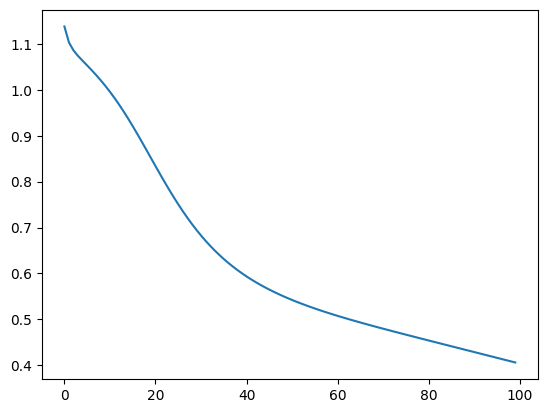

In [ ]:
sns.lineplot(x= range(len(losses)), y = losses)

In [ ]:
X_test_torch = torch.from_numpy(X_test)
with torch.no_grad():
    y_test_hat_softmax = model(X_test_torch)
    y_test_hat = torch.max(y_test_hat_softmax.data, 1)

In [ ]:
accuracy_score(y_test, y_test_hat.indices)

0.9